
Demo of affinity propagation clustering algorithm

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007


Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


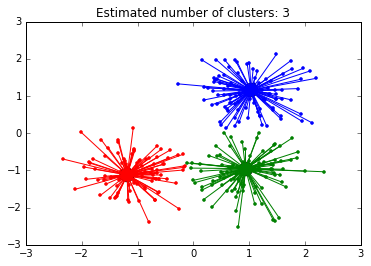

In [2]:
%matplotlib inline
"""
=================================================
Demo of affinity propagation clustering algorithm
=================================================

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007

"""
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

##############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

##############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [4]:
labels_true

array([0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2,
       1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2,
       2])